# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [69]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to build logistic regression model
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_curve,
    auc,
    precision_recall_curve
)

## Loading the dataset

In [4]:
loans = pd.read_csv("loan_modelling.csv")

In [6]:
data = loans.copy()

## Data Overview

* Observations
* Sanity checks

### View the first couple of rows in the dataset

In [8]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [9]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


### Understand the shape

In [10]:
data.shape

(5000, 14)

* The dataset has around 5000 rows and 14 columns

### Check the data typs of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* Each column is of numerical value

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,2500.50000,1443.52000,1.00000,1250.75000,2500.50000,3750.25000,5000.00000
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000


* The `income` ranges from 8,000 to 224,000. 
* The `experience` ranges -3 to 43. The -3 value can possibly be an error in the dataset. 
* The `age` ranges between 23 and 67 for customers. 
* The `mortgage` value has a max of 635,000 while 101,000 is at the 75th percentile which is a huge difference. 

### Check for missing values

In [13]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [40]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

### Observations on Age

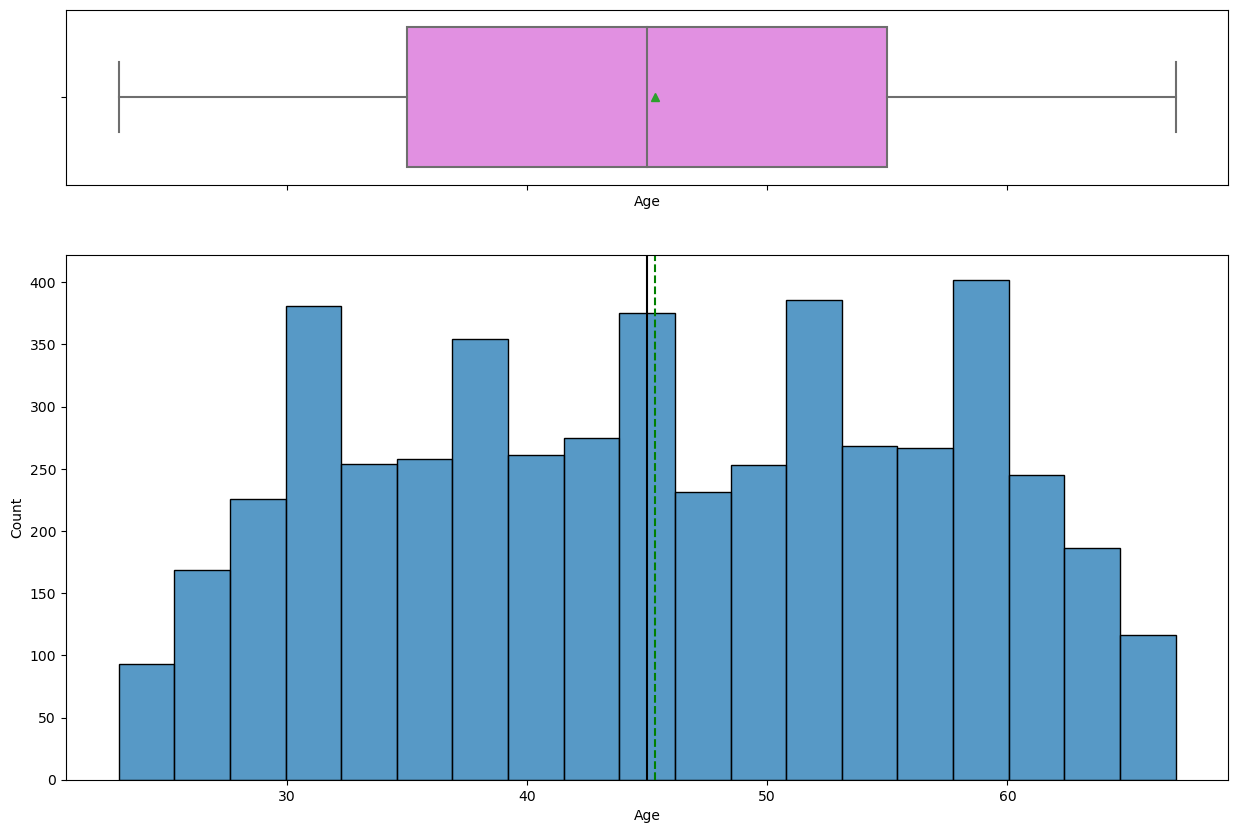

In [17]:
histogram_boxplot(data, "Age")

* The distribution is normally distributed meaning that the age group of customers purchasing a loan is spread out
* Customer purchase loans the most between the ages of 30 and 60

### Observation on Experience

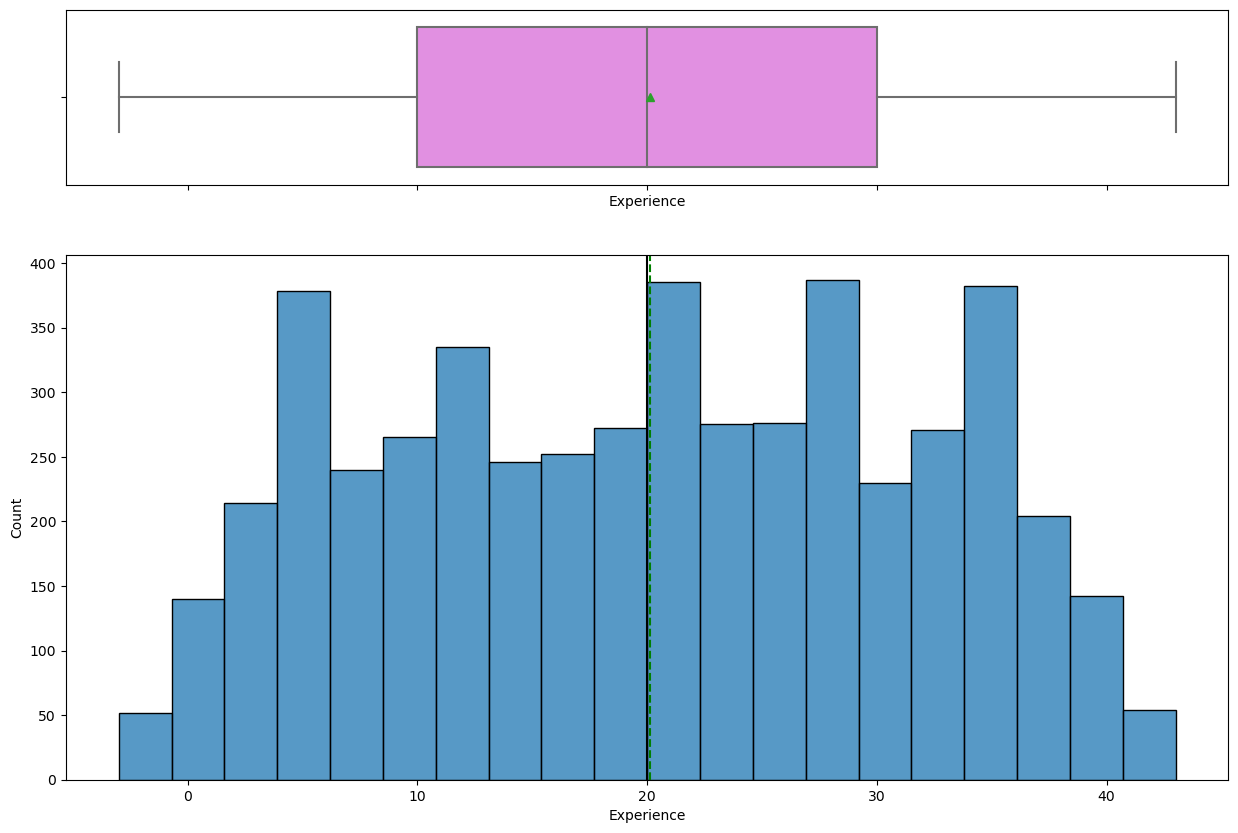

In [18]:
histogram_boxplot(data, "Experience")

* The distribution is normally distributed, customers purchasing a loan have a wide range of professional experience. 

### Observation on Mortgage

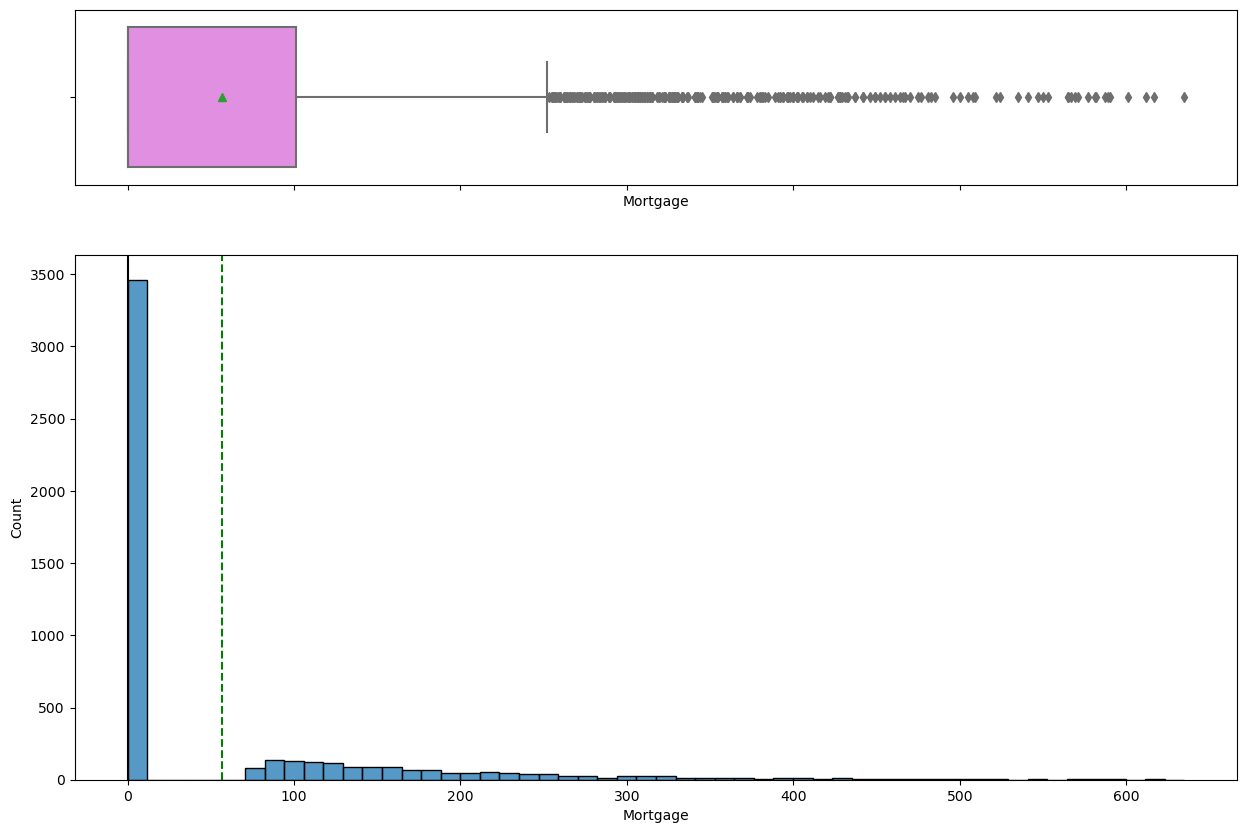

In [19]:
histogram_boxplot(data, "Mortgage")

* The distribution is highly right skewed
* More customers have no current mortgages compared to the ones that do 
* There's many outliers in the data

### Observation on Education

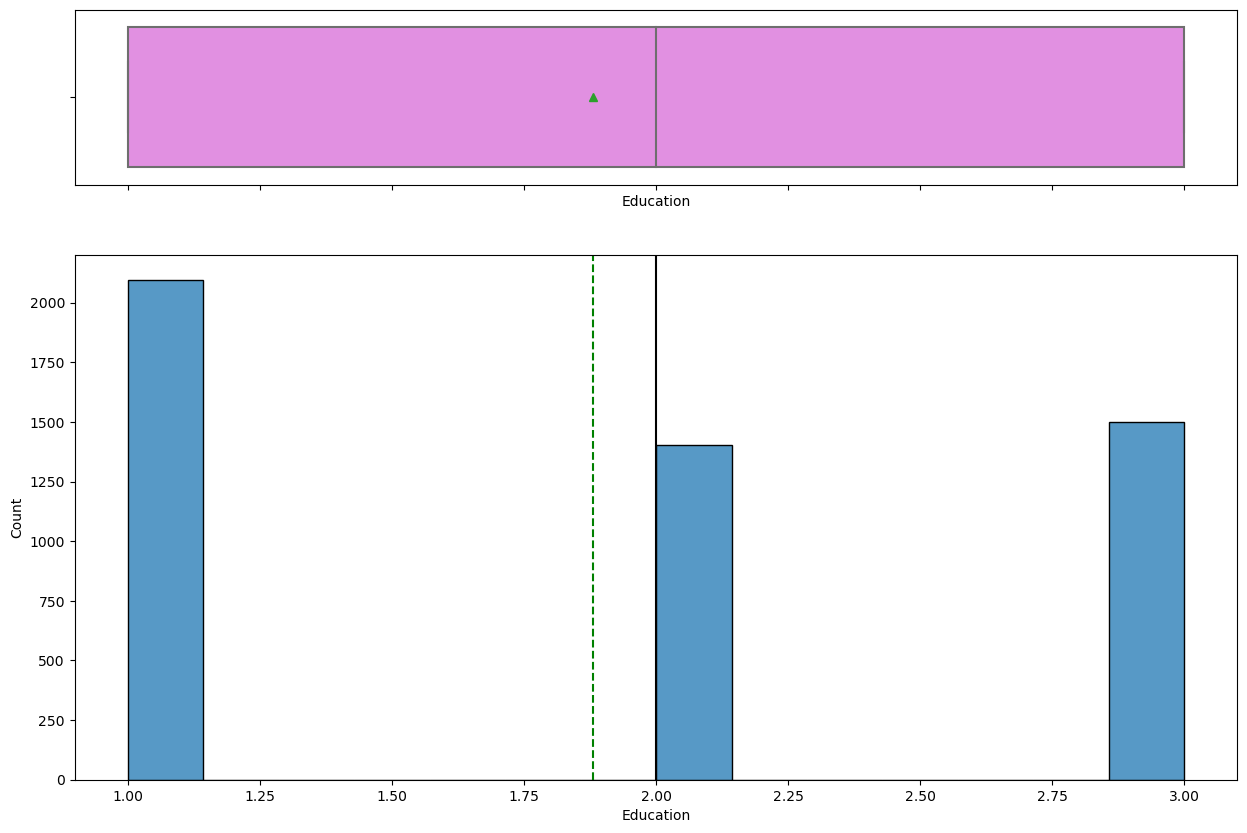

In [21]:
histogram_boxplot(data, "Education")

* The data is normally distributed 
* Most customers have an undergraduate education level

### Observation on Personal Loan

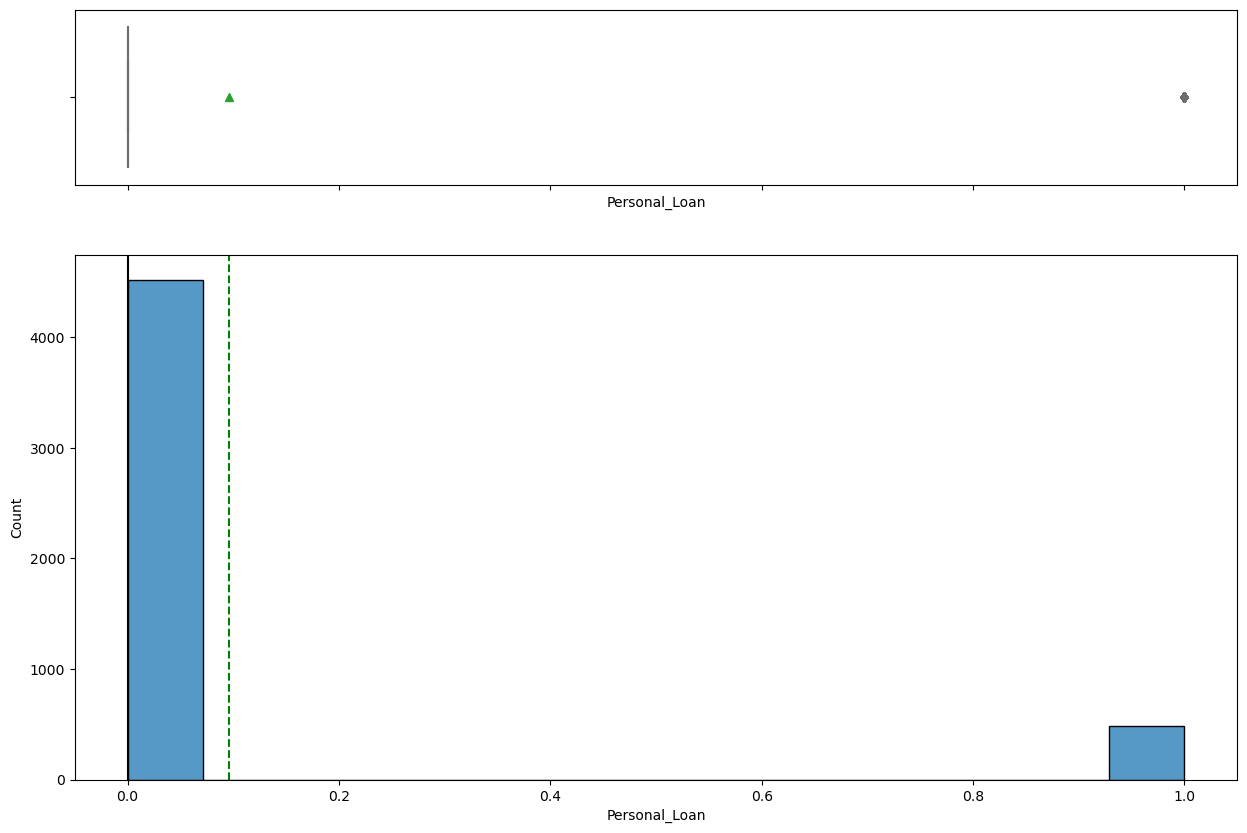

In [66]:
histogram_boxplot(data, "Personal_Loan")

* The distribution is extremely right skewed
* There's a imbalance in the classes for personal loans, more customers are not purchasing loans than customers who are. 

### Observation on Income

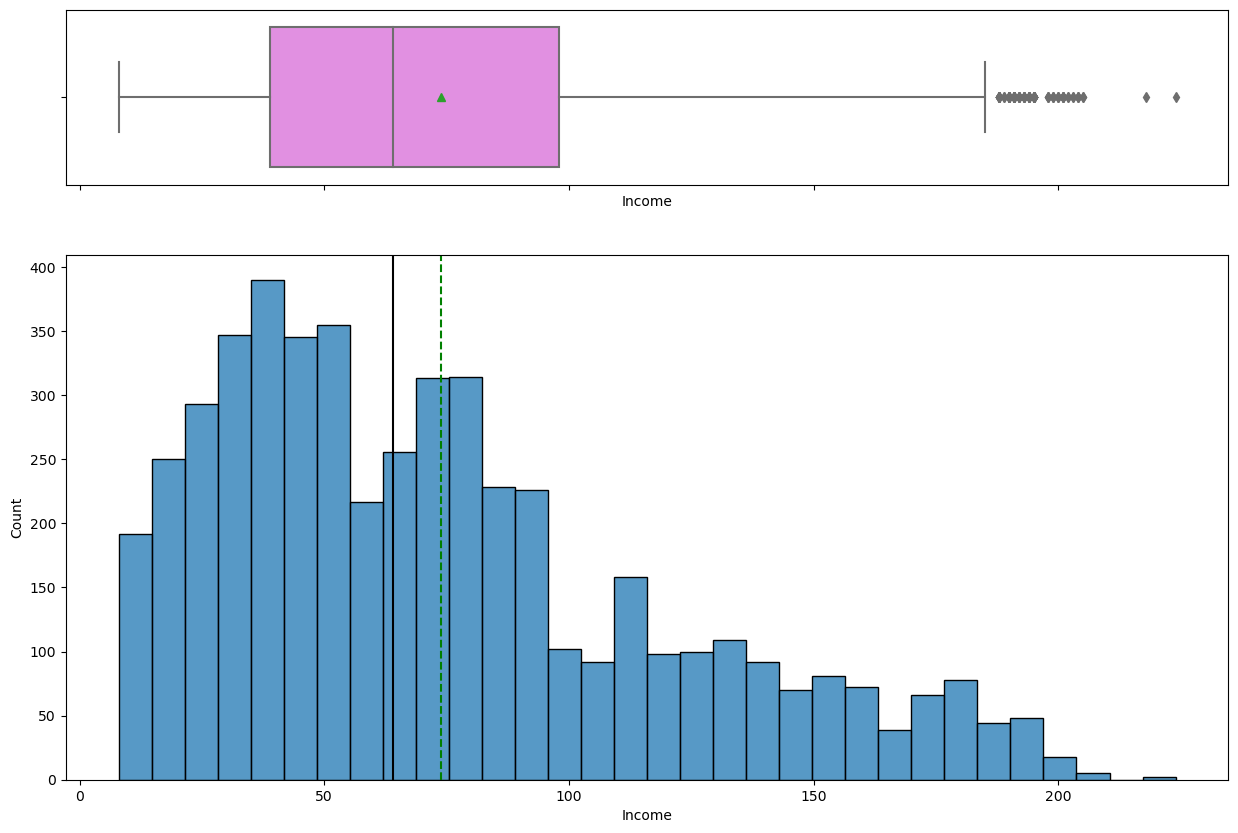

In [22]:
histogram_boxplot(data, "Income")

* The distribution is slightly right skewed
* On average customers have about 73% in annual income
* There's also several outliers in the data

### Observation for Family 

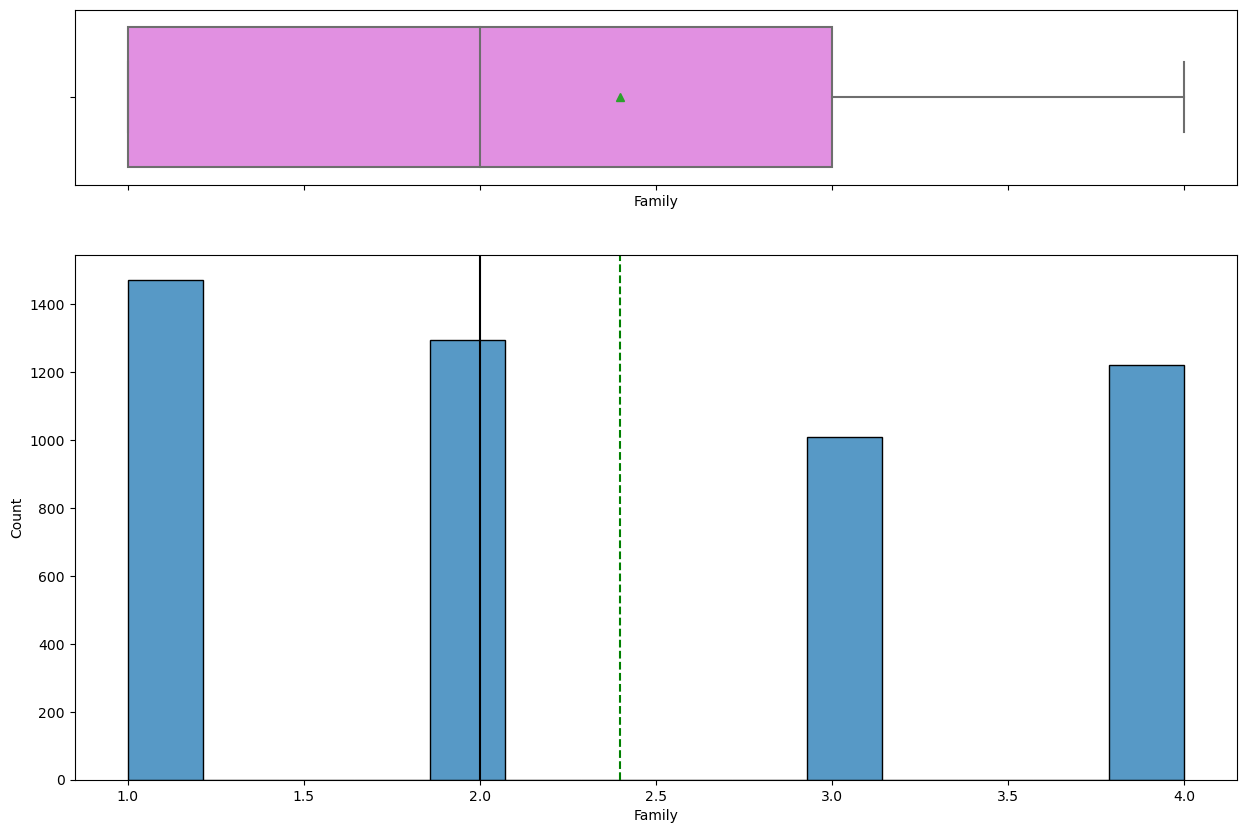

In [57]:
histogram_boxplot(data, "Family")

* The distribution appears to be normally distributed 
* Customers appear to have a family size of one the most

### Observation for Credit Cards

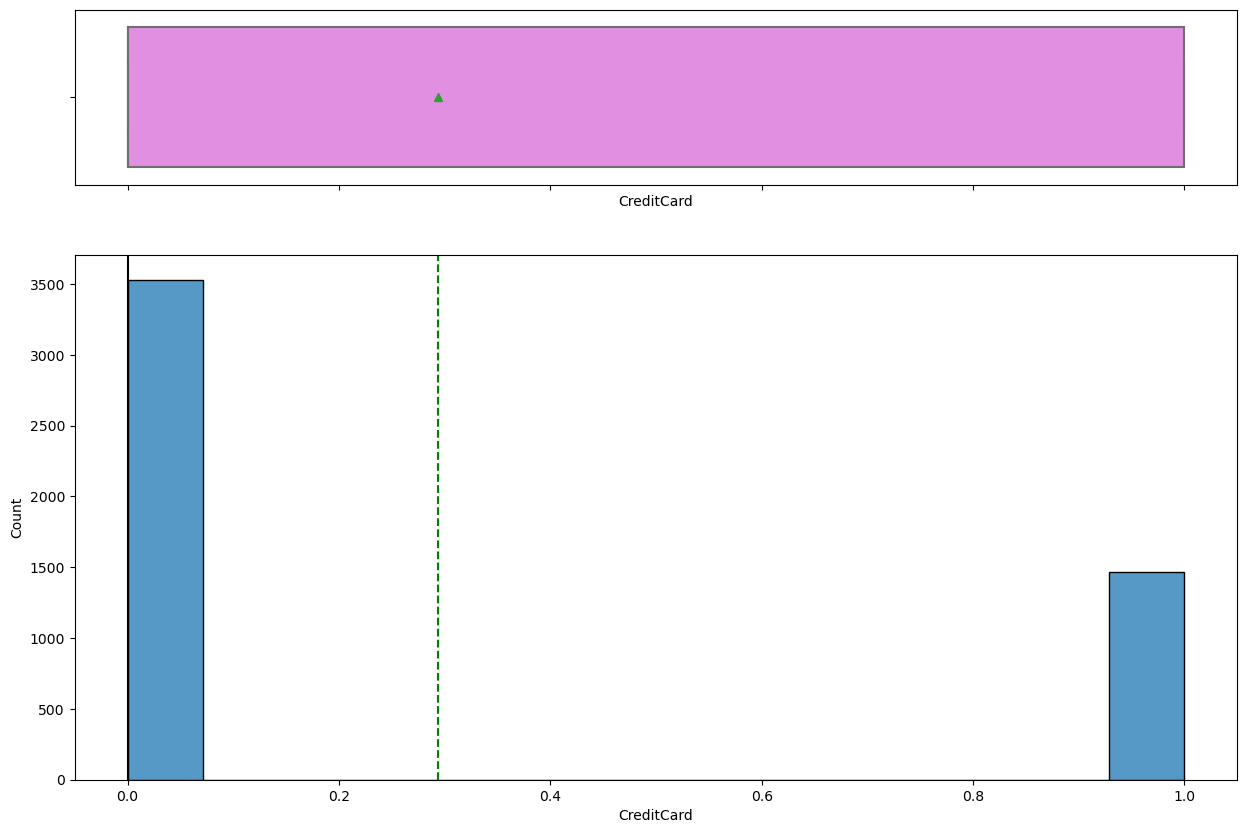

In [23]:
histogram_boxplot(data, "CreditCard")

* About 1500 customers have credit cards with other banks, and 3500 customers do not. 

### Observation on CC Avg

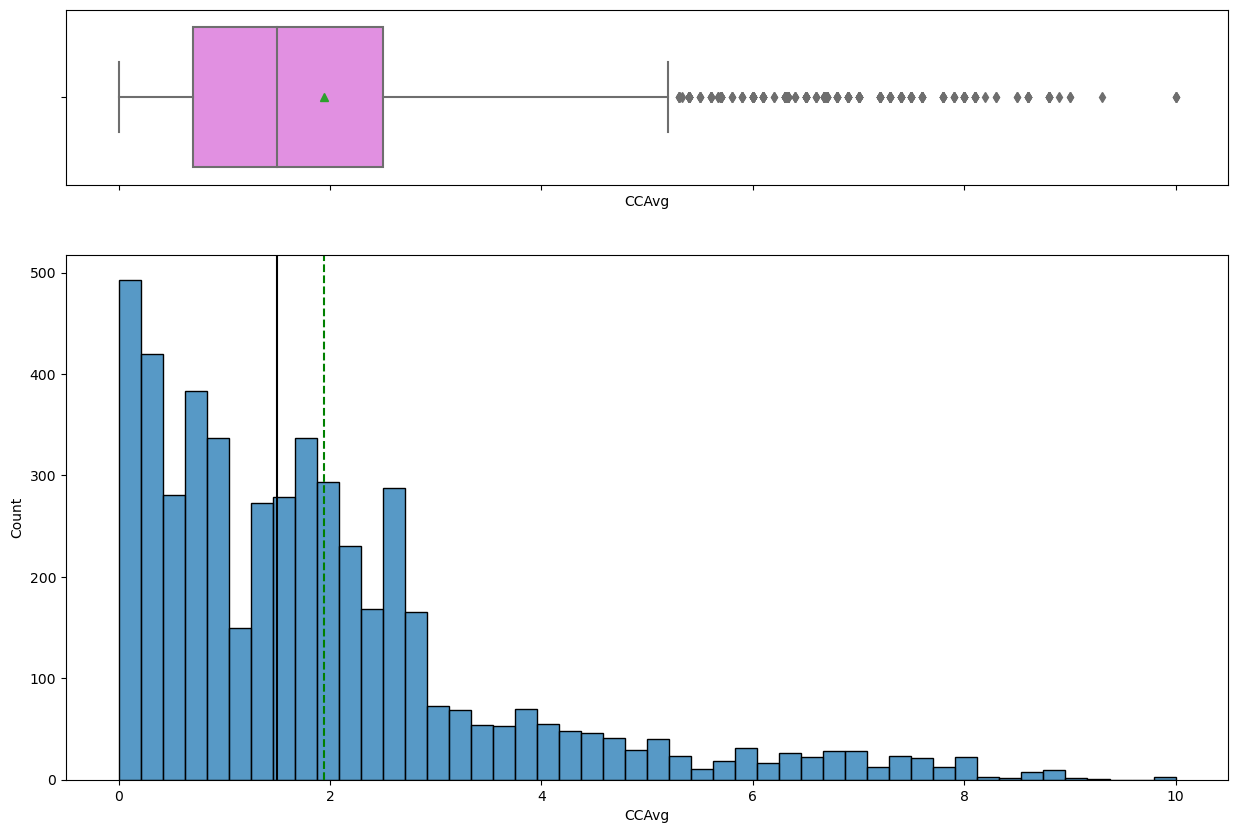

In [37]:
histogram_boxplot(data, "CCAvg")

* The distribution is highly right skewed
* Customers spend 2000 a month on average for credit cards
* There are several outliers in the data 

### Bivariate Analysis

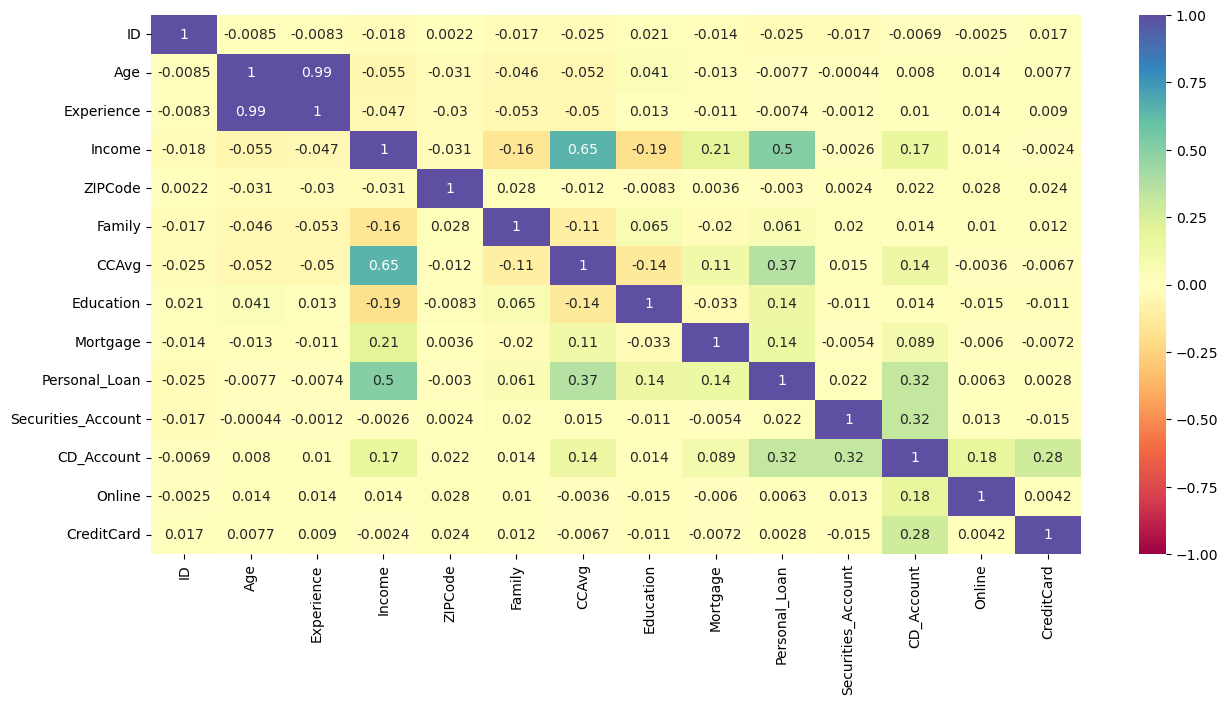

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Income has the highest correlation with Personal Loan, which is understandable customers with a higher income are more likely to get approved for a loan. 
* CCAvg and CD Account also share correlation with Personal Loan

### Age vs Personal Loan

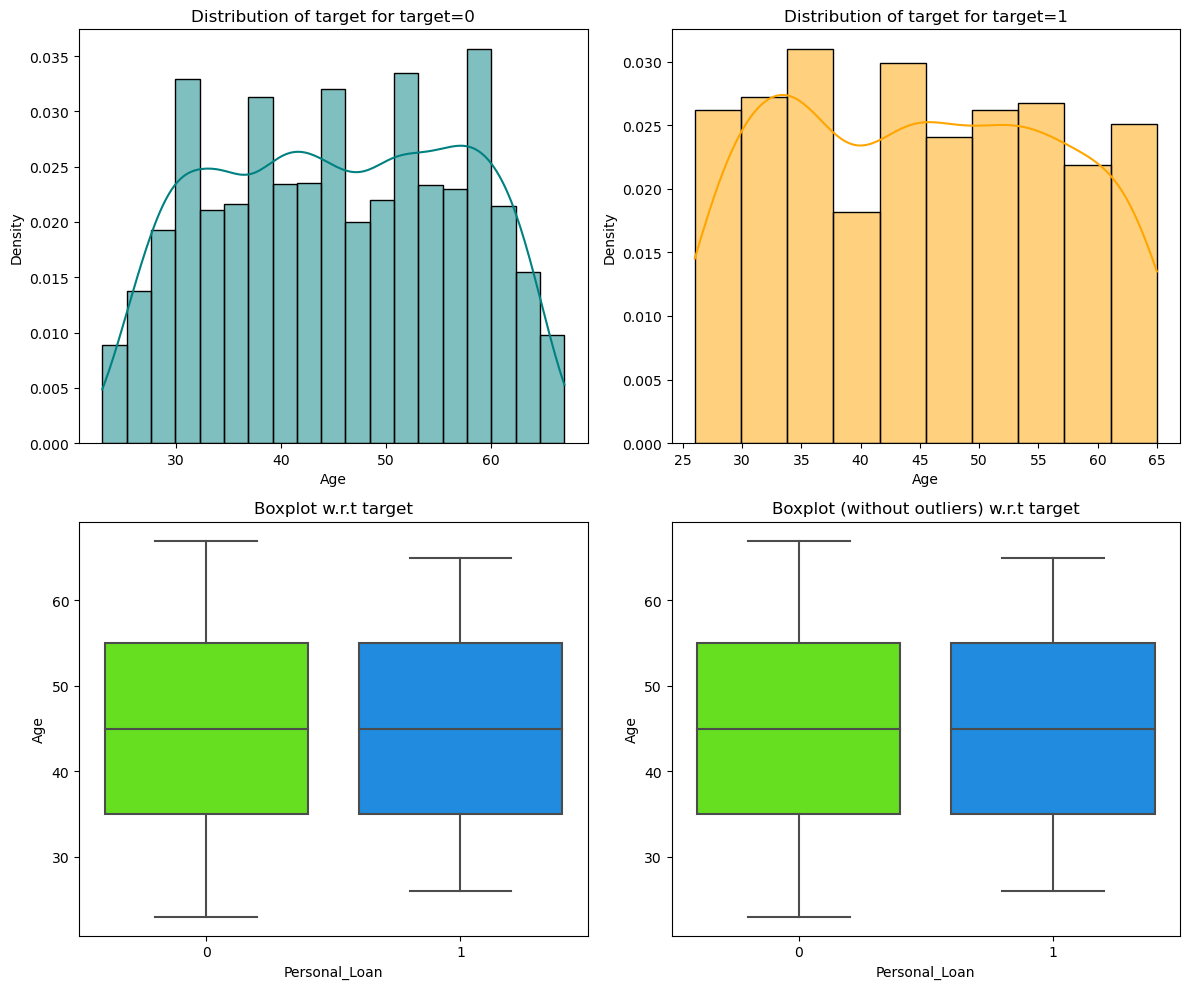

In [41]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* The average age of customers who take out loans and do not take out loans are 45 years old
* More customers are not taking out loans compared to customers that are. 
* Customers usually start taking out loans in their late twenties

### Education vs Personal Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


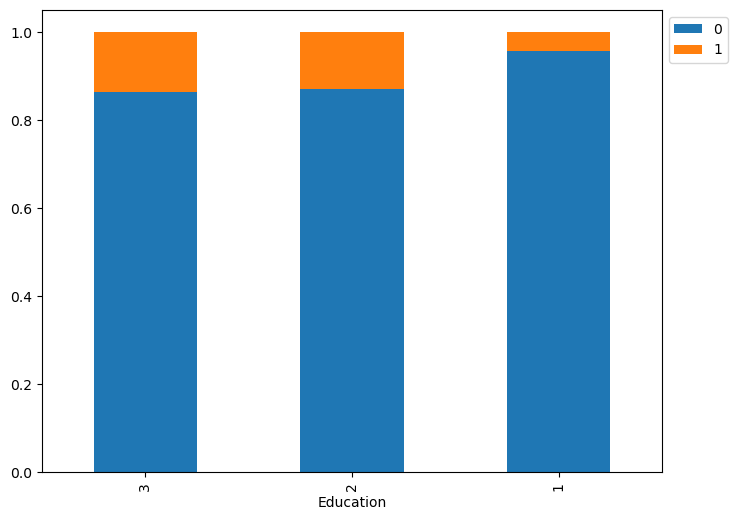

In [33]:
stacked_barplot(data, "Education", "Personal_Loan")

* Customers who have an advanced or professional education are taking out the most personal loans with graduate customers following right behind them.

### Family vs Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


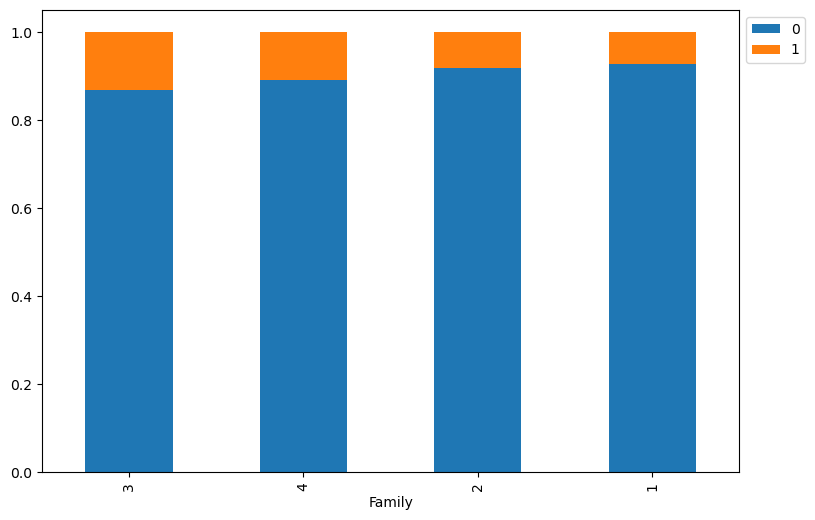

In [58]:
stacked_barplot(data, "Family", "Personal_Loan")

* Customers with differing family sizes that also take out personal loans appears to be distributed almost evenly 

### CD Account vs Personal Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


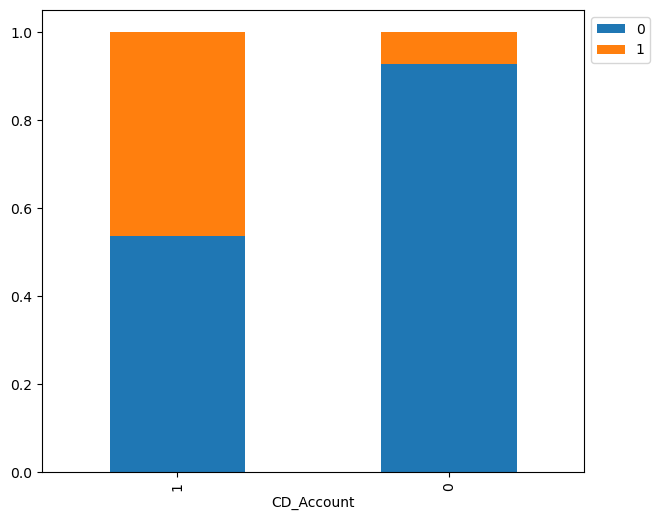

In [36]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* Customers who have a CD Account took out more loans than customers who do not have a CD Account

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Outlier Detection

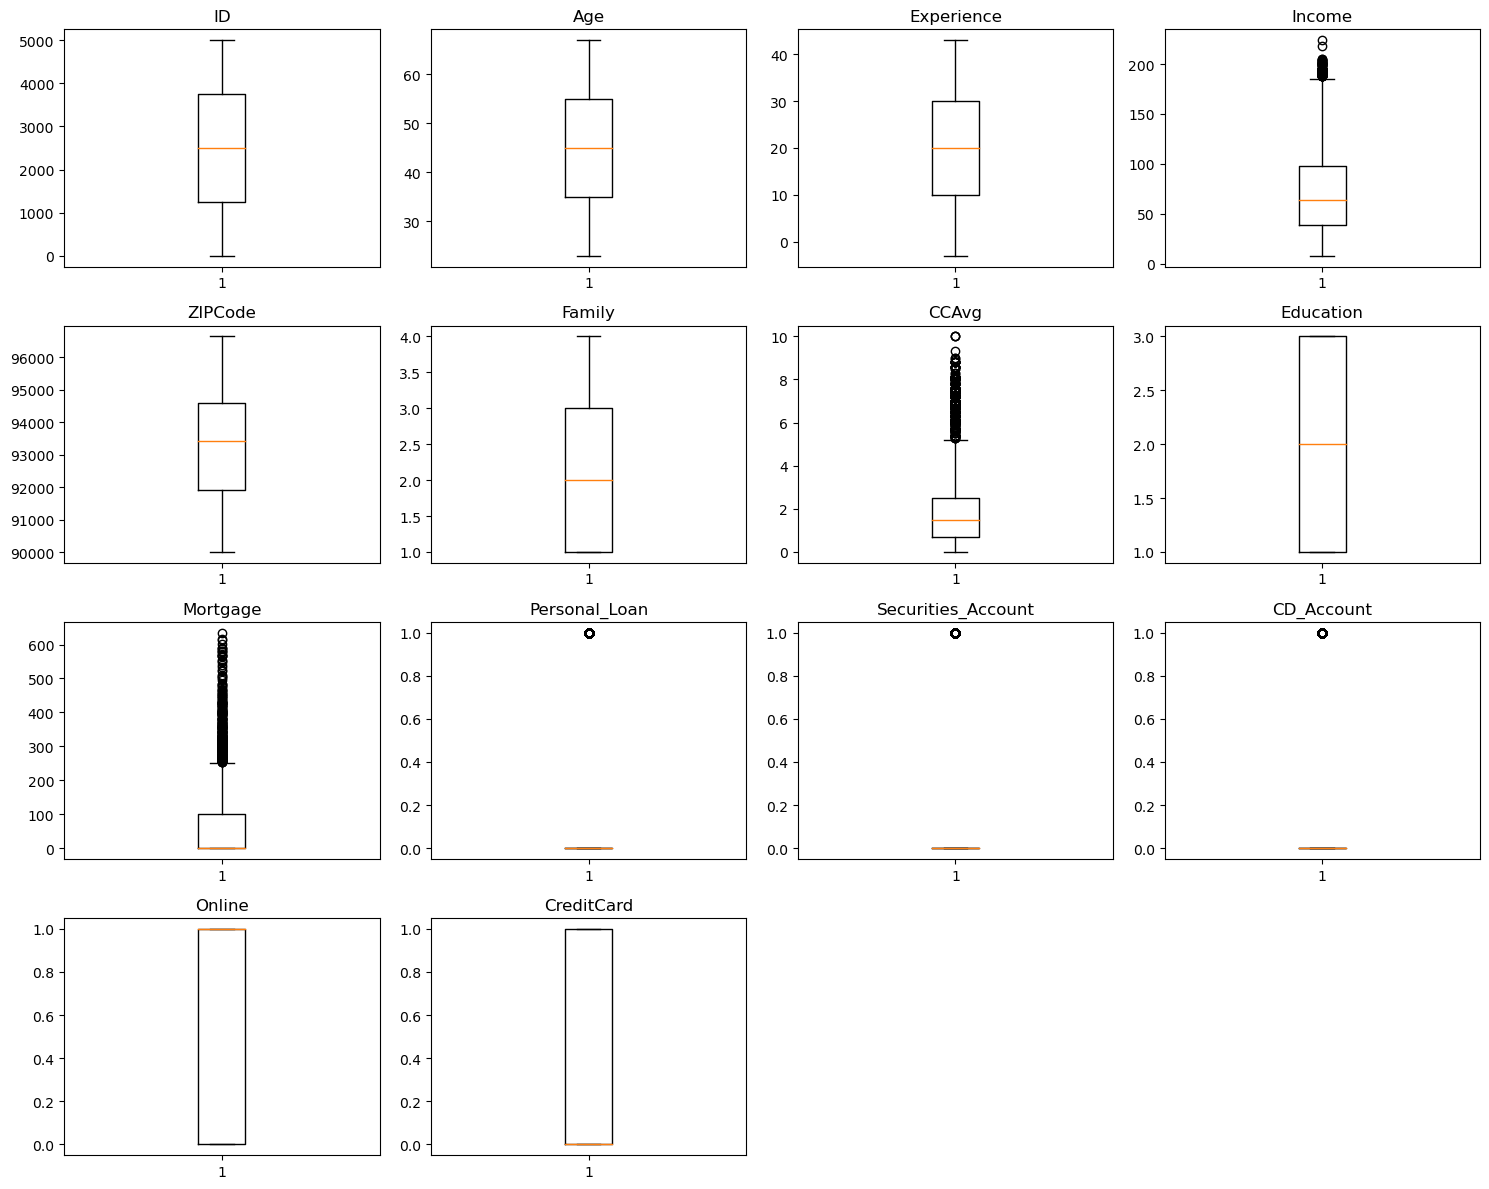

In [39]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are several outliers in the data.
* However, we will not them since they're proper values. 

### Data Preparation

**Create training and test sets.**

In [51]:
X = data.drop(["Personal_Loan", "ID", ], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
0   0.90543
1   0.09457
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.90067
1   0.09933
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:
1. Predicting a customer will purchase a personal loan but in reality, the customer will not. (FP)
2. Predicting a customer will not purchase a personal but in reality, the customer will. (FN)

### Which case is more important?
* If we predict a customer is going to purchase a loan and they don't we can end up wasting money and resources by targeting the wrong customer segments

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [47]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [100]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [101]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building: Logistic Regression


In [53]:
model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

### Finding the coefficients 

In [54]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,-0.11057,0.11415,0.05152,-0.00011,0.70891,0.17266,1.66749,0.00077,-0.78624,3.18904,-0.54509,-0.92072


### Coefficient Interpretations
* Coefficients of Existence, Income, Family, CCAvg, Education, Mortgage, and CD_Account are positive, an increase in these will lead to an increase in chances of a customer purchasing a personal loan.
* Coefficients of Age, Securities_Account, Online, and Credit Card are negative, an increase in these will lead to an decrease in chances of a customer purchasing a personal loan. 

### Odds from coefficients

In [55]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Odds,0.89533,1.12092,1.05287,0.99989,2.03177,1.18846,5.29883,1.00077,0.45556,24.26523,0.57979,0.39823
Change_odd%,-10.46731,12.09185,5.28710,-0.01092,103.17674,18.84580,429.88341,0.07697,-54.44434,2326.52347,-42.02077,-60.17689


### Coefficient Interpretations

* `Age`: Holding all other features constant a unit change in Age will decrease the odds of a customer purchasing a loan by 0.89 times or a 10.46% decrease in the odds.
* `Education`: Holding all other features constant a unit change in Education will increase the odds of a customer purchasing a loan by 5.29 times or a 429.88% increase in the odds.
* `Mortgage`: Holding all other features constant a unit change in Mortgage will increase the odds of a customer purchasing a loan by 1 times or a 0.07% increase in the odds.
* `Income`: Holding all other features constant a unit change in Income will increase the odds of a customer purchasing a loan by 1.05 times or a 5.28% increase in the odds.
* `Experience`: Holding all other features constant a unit change in Experience will increase the odds of a customer purchasing a loan by 1.12 times or a 12.09% increase in the odds.
* `CreditCard`: Holding all other features constant a unit change in CreditCard will decrease the odds of a customer purchasing a loan by 0.39 times or a 60.17% decrease in the odds.

### Checking the model performance on the training set

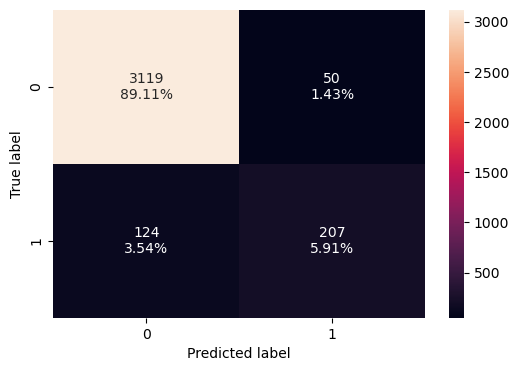

In [59]:
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [60]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95029,0.62538,0.80545,0.70408


### ROC-AUC on the training set

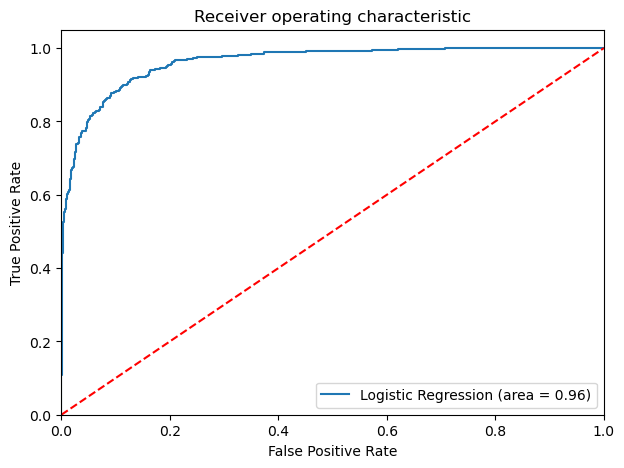

In [65]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* The Logistic Regression Model is giving a good performance on the training set 

### Precision and Recall Curves

Logistic: f1=0.704 auc=0.816


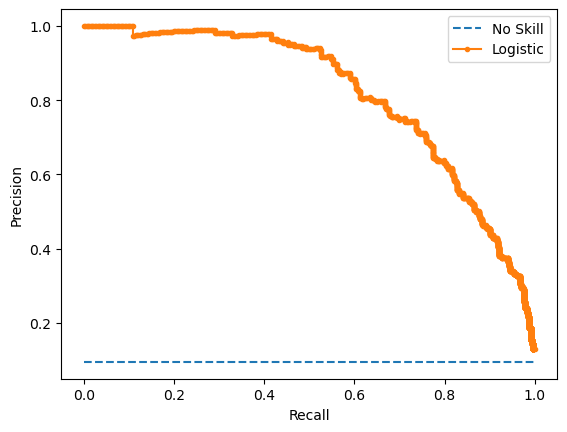

In [72]:
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_train)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_train, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_train, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_train[y_train==1]) / len(y_train)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

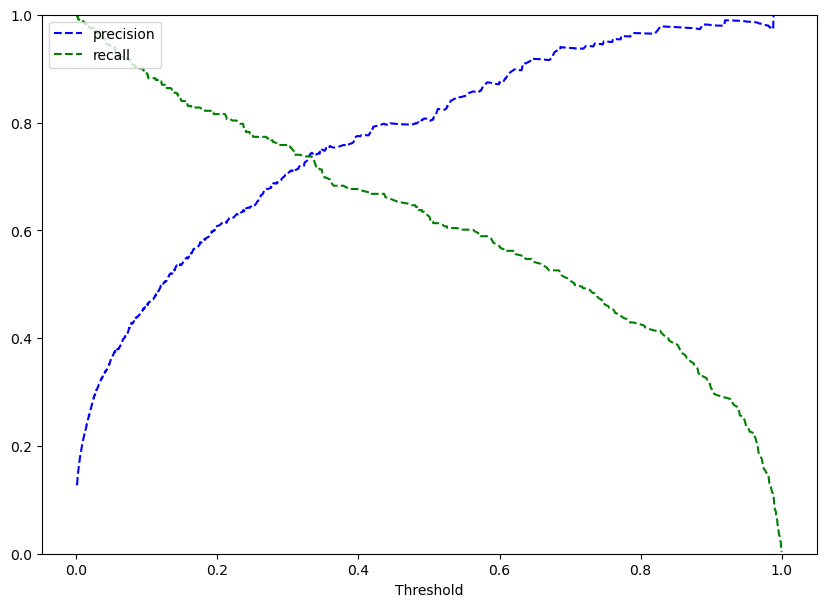

In [77]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* The f1 score and auc indicates that the model is performing well despite an imbalanced dataset

### Checking model performance on the test set

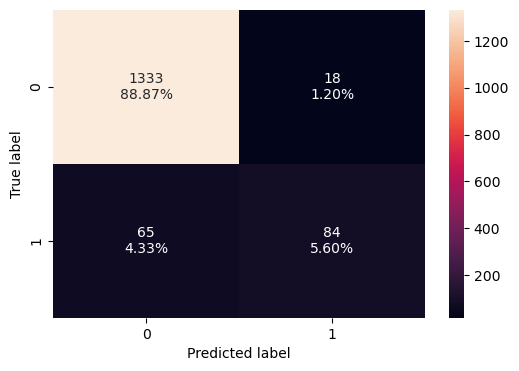

In [88]:
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [89]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Training performance:")
log_reg_model_test_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.94467,0.56376,0.82353,0.66932


### ROC-AUC on the test set

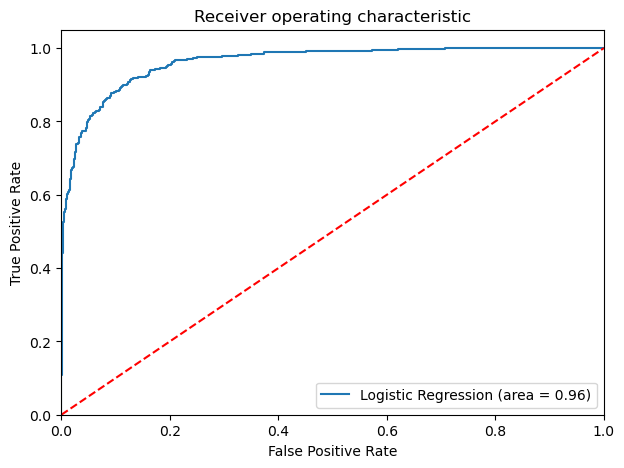

In [90]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Precision and Recall curves

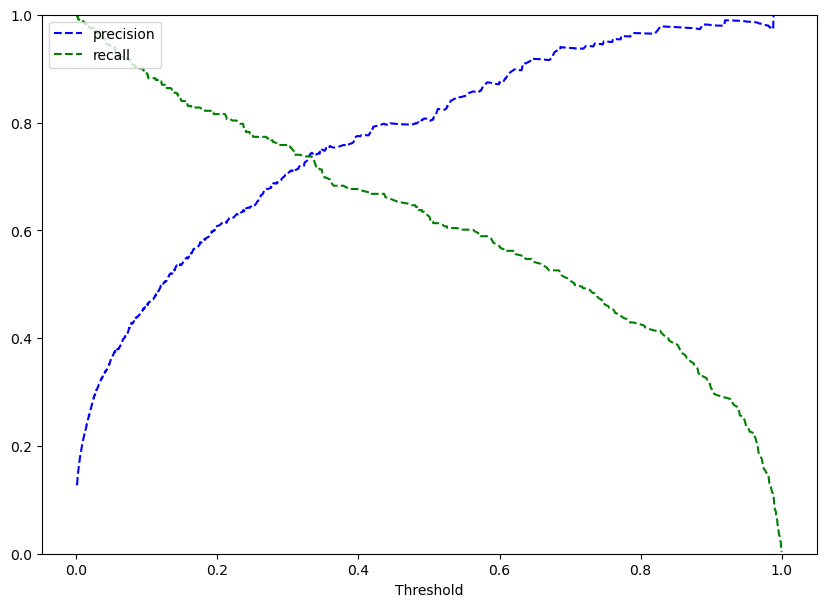

In [91]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### Model Performance Improvement: Logistic Regression

### Optimal threshold using the Precision Recall curve on training set

In [81]:
# setting the threshold
optimal_threshold_curve = 0.3

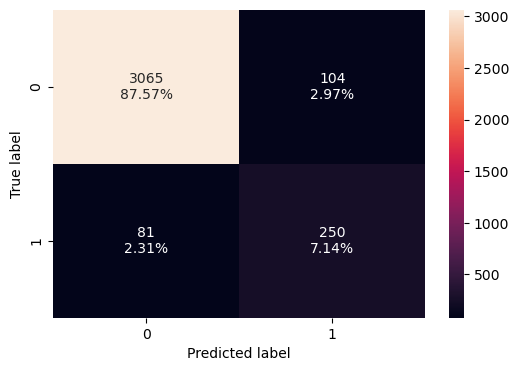

In [82]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [94]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.94714,0.75529,0.70621,0.72993


* Model performance is improved signficantly for recall 
* We are now maximizing recall 

### Optimal threshold using the Precision Recall curve on test set

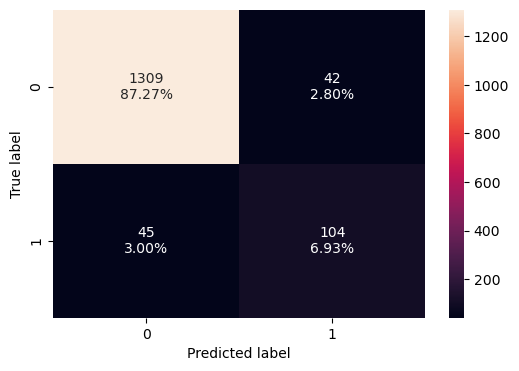

In [92]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [95]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_test_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.94200,0.69799,0.71233,0.70508


### Model Building: Decision Tree

### Decision Tree (default)

In [99]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

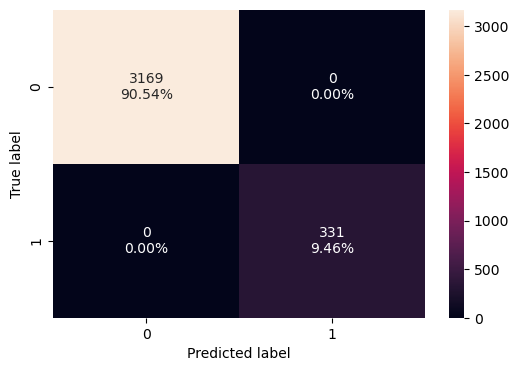

In [102]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [103]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


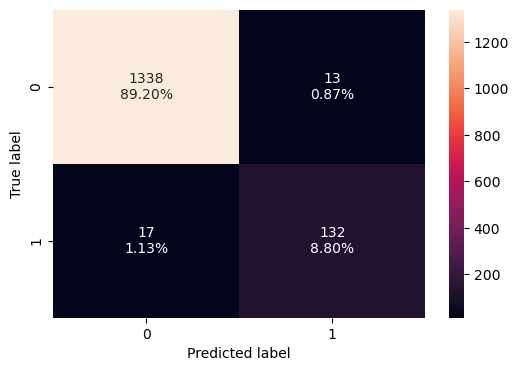

In [104]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [105]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.98000,0.88591,0.91034,0.89796


### Decision Tree (with class_weights)

Since the frequency of the class personal loan 0 is about 10% and class personal loan 1 is 90%, then class personal loan 1 will be the dominant class and the decision tree will be biased to the dominant class. 

With that information we need to set the class_weights to balanced to adjust the weights to the class frequencies of the input data. 

In [111]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

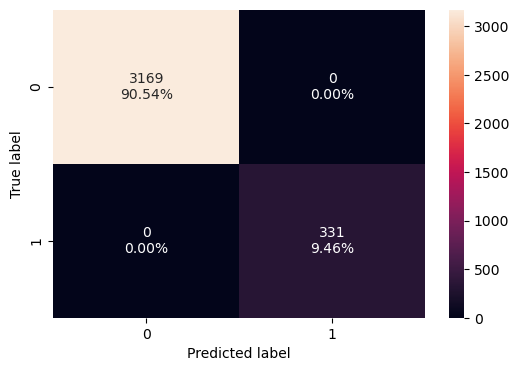

In [112]:
confusion_matrix_sklearn(model, X_train, y_train)

In [113]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* The model is able to perfectly classify the data points in the dataset
* There are 0 errors on the training set

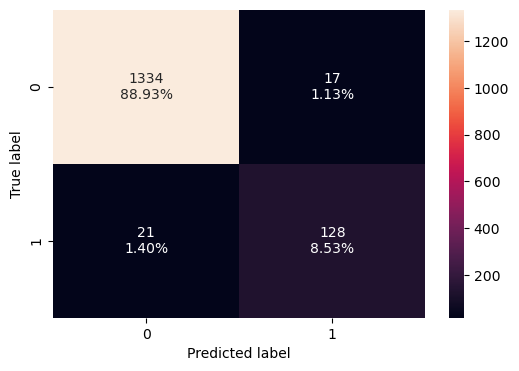

In [114]:
confusion_matrix_sklearn(model, X_test, y_test)

In [115]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97467,0.85906,0.88276,0.87075


Although we didn't apply any restrictions to the trees the test set still performed well which appears as if the model is slightly overfitting since the results are not identical but they're somewhat close. 

### Model Performance Improvement: Decision Tree (Pre-Pruning)

In [106]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

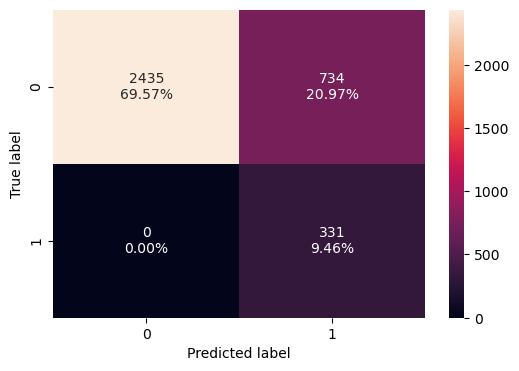

In [107]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [108]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


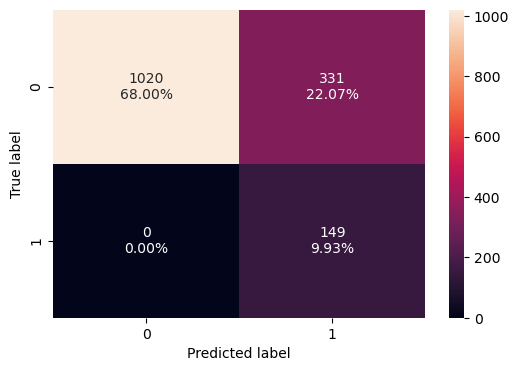

In [116]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [117]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.77933,1.00000,0.31042,0.47377


* The model is giving a generalized result now since the recall scores on both the train and test data are around 1.00 which shows that the model is able to generalize exceptionally well on unseen data.

In [109]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

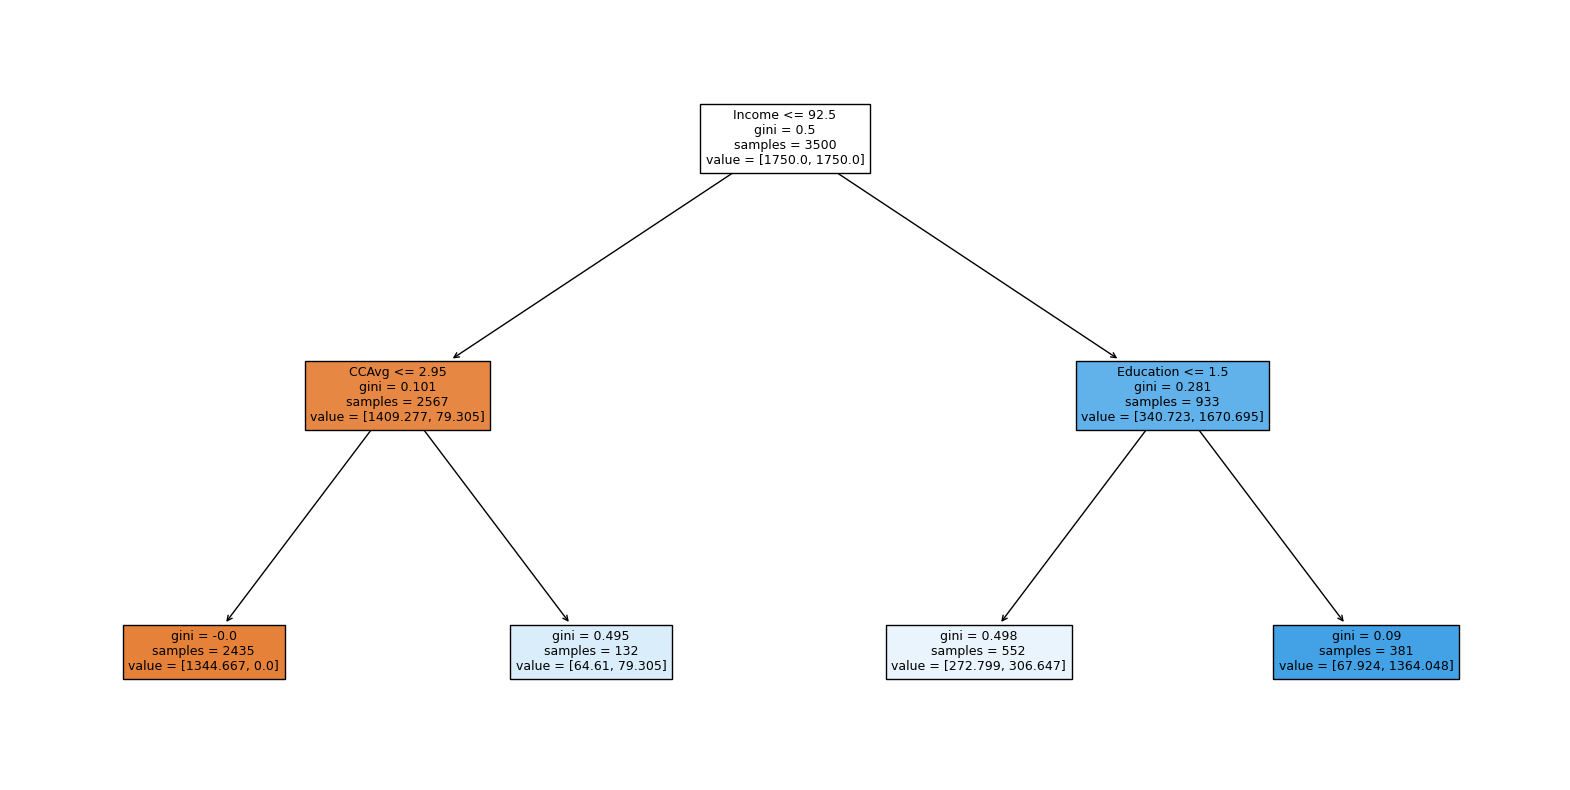

In [110]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [118]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



**Observations from the pre-pruned tree:**

Based on the extracted decision rules if a customer's income is less than or equal to 92.5, the CCAvg is less than or equal to 2.95, then the customer is most likely not going to take out a loan.  

In [119]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.82007181, 0.        , 0.        ,
       0.06262835, 0.11729984, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

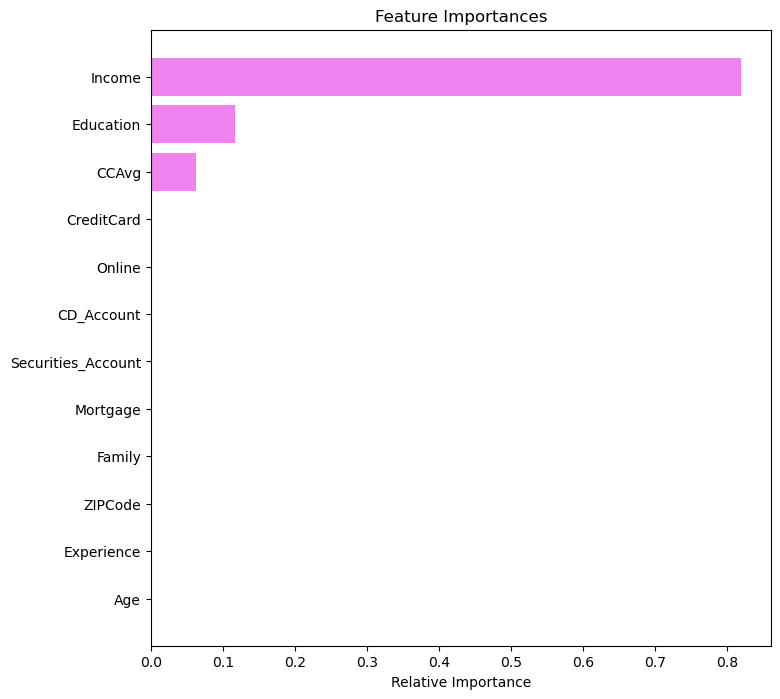

In [120]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the pre-pruned tree Income, Education, and CCAvg are the most important features. 

## Model Comparison and Final Model Selection

In [98]:
# training performance comparison for logistic regression

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.3 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.3 Threshold
Accuracy,0.95029,0.94714
Recall,0.62538,0.75529
Precision,0.80545,0.70621
F1,0.70408,0.72993


In [97]:
# testing performance comparison for logistic regression

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.3 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.3 Threshold
Accuracy,0.94467,0.94200
Recall,0.56376,0.69799
Precision,0.82353,0.71233
F1,0.66932,0.70508


In [121]:
# training performance comparison for decision tree

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning)
Accuracy,1.00000,1.00000,0.79029
Recall,1.00000,1.00000,1.00000
Precision,1.00000,1.00000,0.31080
F1,1.00000,1.00000,0.47421


In [123]:
# testing performance comparison for decision tree

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning)
Accuracy,0.98000,0.97467,0.77933
Recall,0.88591,0.85906,1.00000
Precision,0.91034,0.88276,0.31042
F1,0.89796,0.87075,0.47377


We'll choose the pre-pruned decision tree since it since the score on the test and train sets are very high. 

## Actionable Insights and Business Recommendations


* About 10% of customers have taken out personal loans
* Compared to the decision tree, the logistic regression model didn't maximize the recall measurement although throughout each measurement it was on the balanced side of things. 
* The top features that will predict whether a customer is going to take out a loan or not is their Income, Education, and CCAvg. 
* In the future I recommend that you target customers with an income of more than 92.5, these customers are more likely to take out a loan and have an higher level education which also means that they most likely already have loan(s) and can afford them. 

* The decision tree model built can be used to predict if a customer will take out a loan or not and can identify 100% if a customer doesn't take out a loan.
* Based on the decision tree if a customer's income is less than or equal to 92.5, the CCAvg is less than or equal to 2.95, then the customer is most likely not going to take out a loan.  
